# Libraries & GDrive

In [ ]:
folder_nb = 0

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [81]:
!pip install scipy

In [84]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate

The folder which will read spectrum files.

In [3]:
parent_dir = "/gdrive/My Drive/YL TEZ/py/swan_models/new_models"

In [4]:
os.chdir(parent_dir)

In [5]:
folder_nb = 7

In [6]:
mdate = os.listdir()[folder_nb]
if mdate == "Spectrums" or mdate == "Profiles_Excel":
  folder_nb += 1
else:
  date = mdate[6:]

In [7]:
date

'09260100'

In [8]:
os.chdir("/gdrive/My Drive/YL TEZ/py/swan_models/new_models/Spectrums")

In [9]:
file_name = date + "_Fit_Data.xlsx"

In [10]:
file_name

'09260100_Fit_Data.xlsx'

# Determine boundary sensor

In [ ]:
spec_file = pd.ExcelFile(file_name)

In [ ]:
p87 = date + ".ppp87"
p19 = date + ".ppp19"
p18 = date + ".ppp18"
p45 = date + ".ppp45"
p17 = date + ".ppp17"
p15 = date + ".ppp15"
p16 = date + ".ppp16"
p14 = date + ".ppp14"
p13 = date + ".ppp13"
p12 = date + ".ppp12"
p26 = date + ".ppp26"
p23 = date + ".ppp23"
p05 = date + ".ppp05"
p04 = date + ".ppp04"
p03 = date + ".ppp03"
p02 = date + ".ppp02"
p01 = date + ".ppp01"

In [ ]:
if p87 in spec_file.sheet_names:
  sheetname = p87
  boun_loc = "-884.1100"
elif p19 in spec_file.sheet_names:
  sheetname = p19
  boun_loc = "-480.3400"
elif p18 in spec_file.sheet_names:
  sheetname = p18
  boun_loc = "-398.3900"
elif p45 in spec_file.sheet_names:
  sheetname = p45
  boun_loc = "-370.0800"
elif p17 in spec_file.sheet_names:
  sheetname = p17
  boun_loc = "-320.3700"
elif p15 in spec_file.sheet_names:
  sheetname = p15
  boun_loc = "-264.7000"
elif p16 in spec_file.sheet_names:
  sheetname = p16
  boun_loc = "-252.0300"
elif p14 in spec_file.sheet_names:
  sheetname = p14
  boun_loc = "-240.55000"
elif p13 in spec_file.sheet_names:
  sheetname = p13
  boun_loc = "-220.2300"
elif p12 in spec_file.sheet_names:
  sheetname = p12
  boun_loc = "-205.3400"
elif p26 in spec_file.sheet_names:
  sheetname = p26
  boun_loc = "-190.2000"
elif p23 in spec_file.sheet_names:
  sheetname = p23
  boun_loc = "-190.2000"
elif p05 in spec_file.sheet_names:
  sheetname = p05
  boun_loc = "-169.5000"
elif p04 in spec_file.sheet_names:
  sheetname = p04
  boun_loc = "-160.7700"
elif p03 in spec_file.sheet_names:
  sheetname = p03
  boun_loc = "-145.4200"
elif p02 in spec_file.sheet_names:
  sheetname = p02
  boun_loc = "-135.0100"
elif p01 in spec_file.sheet_names:
  sheetname = p01
  boun_loc = "-124.9400"
print("Boundary sensor name:\t \t", sheetname)
print("Boundary sensor location(x):\t", boun_loc)

Boundary sensor name:	 	 09260100.ppp87
Boundary sensor location(x):	 -884.1100


# Read Spectrum Files

In [ ]:
boundary_sensor = sheetname

In [67]:
os.mkdir(parent_dir + '/' + 'model_' + date + '/' + 'Results' + '/' + 'SWAN_measurement_substaction')

## Read Model Results & Spectrum File
- DATE_model_result.xlsx
- DATE_Fit_Data.xlsx

In [11]:
measure_excel = pd.ExcelFile(file_name)
measure_excel.sheet_names

['09260100.ppp02',
 '09260100.ppp03',
 '09260100.ppp04',
 '09260100.ppp14',
 '09260100.ppp13',
 '09260100.ppp05',
 '09260100.ppp12',
 '09260100.ppp23',
 '09260100.ppp16',
 '09260100.ppp15',
 '09260100.ppp19',
 '09260100.ppp17',
 '09260100.ppp18',
 '09260100.ppp45',
 '09260100.ppp87']

In [14]:
path_ = parent_dir + '/' + 'model_' + date + '/' + 'Results/' + 'model_result.xlsx'

In [15]:
#swan_excel is the SWAN Result Spectrum Excel File
swan_excel = pd.ExcelFile(path_)
swan_excel.sheet_names

['p02',
 'p03',
 'p04',
 'p05',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p17',
 'p18',
 'p23',
 'p45',
 'p19',
 'p87']

In [65]:
!pip install XlsxWriter

     |████████████████████████████████| 149 kB 5.0 MB/s 


In [89]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(parent_dir + '/' + 'model_' + date + '/' + 'Results'+ '/' + 'SWAN_measurement_substaction' + '/' + 'SWAN_measurement_' + date + "_substaction_.xlsx", engine='xlsxwriter')

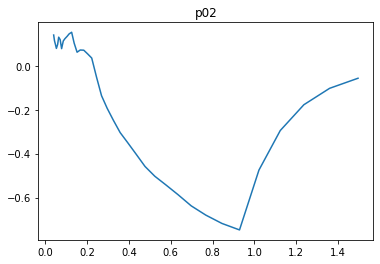

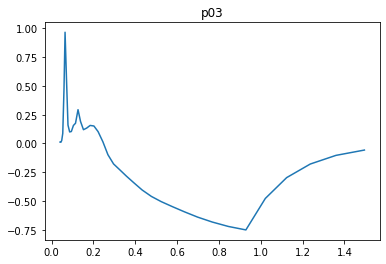

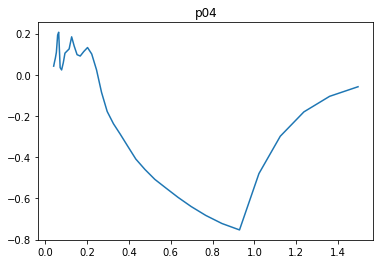

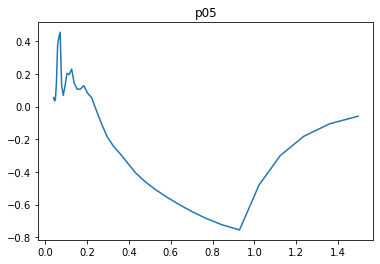

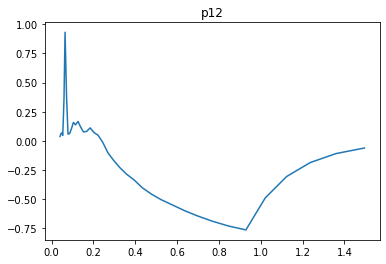

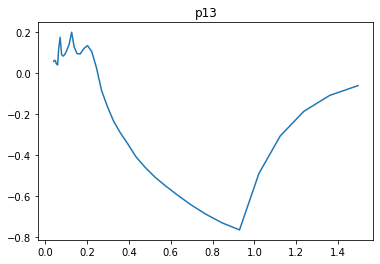

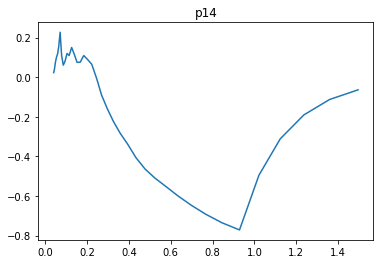

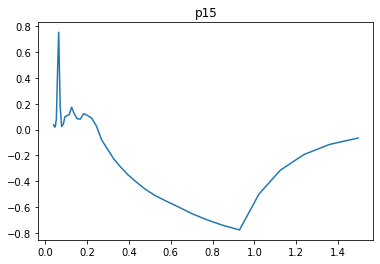

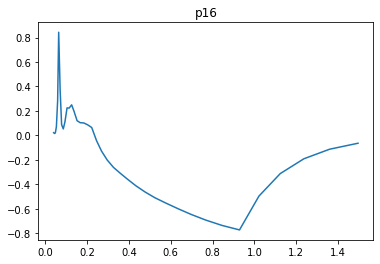

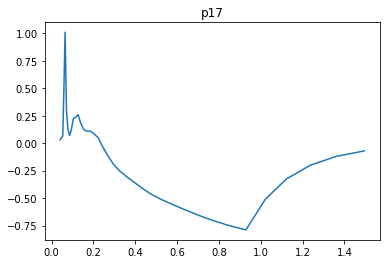

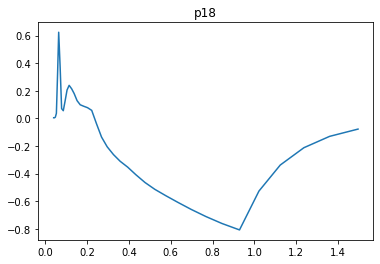

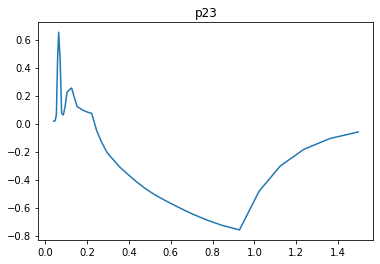

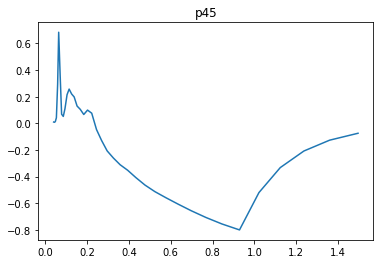

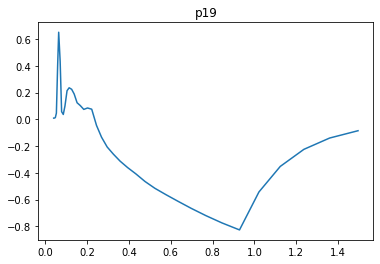

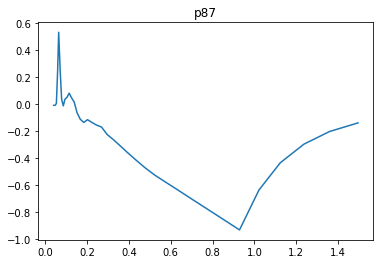

In [108]:
swan_excel = pd.ExcelFile(path_)
sheets = swan_excel.sheet_names
for j in range(len(sheets)):
  data_fit = pd.read_excel(measure_excel, measure_excel.sheet_names[j], index_col=0)
  x = data_fit["Freq"].values
  y = data_fit["PSSE (Fit)"].values
  f = interp1d(x, y, fill_value='extrapolate')
  f2 = interp1d(x, y, kind='cubic', fill_value='extrapolate')
  xnew = np.array([0.040, 0.044, 0.048, 0.053, 0.059, 0.064, 0.071, 0.078, 0.086, 0.094, 0.104, 0.114, 0.126, 0.138, 0.152, 0.167, 0.184, 0.202, 0.222, 0.245, 0.269, 0.296, 0.326, 0.358, 0.394, 0.433, 0.477, 0.524, 0.577, 0.635, 0.698, 0.768, 0.845, 0.929, 1.022, 1.124, 1.237, 1.360, 1.496])
  ynew1 = f(xnew)
  ynew2 = f2(xnew)
  ynew = np.concatenate((ynew1[0:35], ynew2[35:]), axis=0)
  df = pd.read_excel(swan_excel, sheets[j], index_col=0)
  y_fit = df.iloc[1:, 1].values
  y_fit = y_fit.astype('float64')
  subs = ynew-y_fit
  DF = pd.DataFrame({"Frequency":xnew, "Substaction":subs})
  DF.to_excel(writer, sheet_name=sheets[j])
  plt.plot(DF.iloc[:, 0], DF.iloc[:, 1])
  plt.title(sheets[j])
  plt.savefig(parent_dir + '/' + 'model_' + date + '/' + 'Results'+ '/' + 'SWAN_measurement_substaction' + '/' + sheets[j] + ".png")
  plt.show()
  trapz = np.trapz(subs, xnew)
  simpson = integrate.simps(subs, xnew)
  sheet_name = sheets[j]
  wsheet = writer.sheets[sheet_name]
  wsheet.write('D1', 'Integration Rule')
  wsheet.write('D2', 'Trapezoidal')
  wsheet.write('D3', 'Simpson')
  wsheet.write('E2', trapz)
  wsheet.write('E3', simpson)
writer.save()

In [88]:
trapz = np.trapz(subs, xnew)
simpson = integrate.simps(subs, xnew)

-0.6191624740767034

In [109]:
%cd SWAN_measurement_substaction/
%ls *xlsx

[Errno 2] No such file or directory: 'SWAN_measurement_substaction/'
/gdrive/MyDrive/YL TEZ/py/swan_models/new_models/model_09260100/Results/SWAN_measurement_substaction
SWAN_measurement_09260100_substaction_.xlsx


In [ ]:
#folder_nb += 1
#folder_nb